# Racing analysis
Formula 1 data summaries

In [6]:
import pandas as pd

In [7]:
pd.set_option("display.max_columns", None)
pd.options.display.width = 0

## Step one: discover

In [8]:
drivers = pd.read_csv("/home/andy/ws/client-files/uw/src/uw/py310_lesson09/drivers.csv", engine='python')

In [9]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
837,838,vandoorne,2.0,VAN,Stoffel,Vandoorne,26/03/1992,Belgian,http://en.wikipedia.org/wiki/Stoffel_Vandoorne
838,839,ocon,31.0,OCO,Esteban,Ocon,17/09/1996,French,http://en.wikipedia.org/wiki/Esteban_Ocon
839,840,stroll,18.0,STR,Lance,Stroll,29/10/1998,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll
840,841,giovinazzi,36.0,GIO,Antonio,Giovinazzi,14/12/1993,Italian,http://en.wikipedia.org/wiki/Antonio_Giovinazzi


In [10]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   driverId     842 non-null    int64  
 1   driverRef    842 non-null    object 
 2   number       38 non-null     float64
 3   code         85 non-null     object 
 4   forename     842 non-null    object 
 5   surname      842 non-null    object 
 6   dob          841 non-null    object 
 7   nationality  842 non-null    object 
 8   url          841 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 59.3+ KB


In [11]:
drivers.describe()

,driverId,number
count,842.000000,38.000000
mean,421.540380,30.500000
std,243.275985,27.682319
min,1.000000,2.000000
25%,211.250000,10.250000
50%,421.500000,21.500000
75%,631.750000,38.250000
max,843.000000,99.000000


## Step two: cleanse

In [12]:
print("Columns with missing values\n")

for column in drivers:
    print(column, ' : ', drivers[column].isnull().sum())

Columns with missing values

driverId  :  0
driverRef  :  0
number  :  804
code  :  757
forename  :  0
surname  :  0
dob  :  1
nationality  :  0
url  :  1


In [13]:
drivers.columns[drivers.isnull().any()]

Index(['number', 'code', 'dob', 'url'], dtype='object')

In [14]:
blanks = pd.DataFrame(drivers, columns = ['number', 'code', 'dob', 'url'])

In [15]:
blanks

,number,code,dob,url
0,44.0,HAM,07/01/1985,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,NaN,HEI,10/05/1977,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,6.0,ROS,27/06/1985,http://en.wikipedia.org/wiki/Nico_Rosberg
3,14.0,ALO,29/07/1981,http://en.wikipedia.org/wiki/Fernando_Alonso
4,NaN,KOV,19/10/1981,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...
837,2.0,VAN,26/03/1992,http://en.wikipedia.org/wiki/Stoffel_Vandoorne
838,31.0,OCO,17/09/1996,http://en.wikipedia.org/wiki/Esteban_Ocon
839,18.0,STR,29/10/1998,http://en.wikipedia.org/wiki/Lance_Stroll
840,36.0,GIO,14/12/1993,http://en.wikipedia.org/wiki/Antonio_Giovinazzi


In [16]:
print("% blank\n")
print(round((drivers.isnull().sum() * 100/ len(drivers)),2).sort_values(ascending=False))

% blank

number         95.49
code           89.90
dob             0.12
url             0.12
driverId        0.00
driverRef       0.00
forename        0.00
surname         0.00
nationality     0.00
dtype: float64


hmmm... This tells me that code is not a good field on which to id a driver

In [17]:
drivers['number'] = drivers['number'].astype(str)

In [18]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,nan,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,nan,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
837,838,vandoorne,2.0,VAN,Stoffel,Vandoorne,26/03/1992,Belgian,http://en.wikipedia.org/wiki/Stoffel_Vandoorne
838,839,ocon,31.0,OCO,Esteban,Ocon,17/09/1996,French,http://en.wikipedia.org/wiki/Esteban_Ocon
839,840,stroll,18.0,STR,Lance,Stroll,29/10/1998,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll
840,841,giovinazzi,36.0,GIO,Antonio,Giovinazzi,14/12/1993,Italian,http://en.wikipedia.org/wiki/Antonio_Giovinazzi


In [19]:
nationality = drivers.groupby(['nationality'])['driverRef'].count()

In [20]:
nationality

nationality
American             157
American-Italian       1
Argentine             24
Argentine-Italian      1
Australian            17
Austrian              15
Belgian               23
Brazilian             31
British              162
Canadian              13
Chilean                1
Colombian              3
Czech                  1
Danish                 5
Dutch                 17
East German            3
Finnish                9
French                73
German                49
Hungarian              1
Indian                 2
Indonesian             1
Irish                  5
Italian               99
Japanese              19
Liechtensteiner        1
Malaysian              1
Mexican                6
Monegasque             3
New Zealander          9
Polish                 1
Portuguese             4
Rhodesian              4
Russian                2
South African         23
Spanish               15
Swedish               10
Swiss                 23
Thai                   1
Uruguayan    

In [21]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     842 non-null    int64 
 1   driverRef    842 non-null    object
 2   number       842 non-null    object
 3   code         85 non-null     object
 4   forename     842 non-null    object
 5   surname      842 non-null    object
 6   dob          841 non-null    object
 7   nationality  842 non-null    object
 8   url          841 non-null    object
dtypes: int64(1), object(8)
memory usage: 59.3+ KB


In [22]:
drivers['full_name'] = drivers['surname'] + ", " + drivers['forename']

In [23]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,full_name
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,"Hamilton, Lewis"
1,2,heidfeld,nan,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,"Heidfeld, Nick"
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg,"Rosberg, Nico"
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,"Alonso, Fernando"
4,5,kovalainen,nan,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,"Kovalainen, Heikki"
...,...,...,...,...,...,...,...,...,...,...
837,838,vandoorne,2.0,VAN,Stoffel,Vandoorne,26/03/1992,Belgian,http://en.wikipedia.org/wiki/Stoffel_Vandoorne,"Vandoorne, Stoffel"
838,839,ocon,31.0,OCO,Esteban,Ocon,17/09/1996,French,http://en.wikipedia.org/wiki/Esteban_Ocon,"Ocon, Esteban"
839,840,stroll,18.0,STR,Lance,Stroll,29/10/1998,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll,"Stroll, Lance"
840,841,giovinazzi,36.0,GIO,Antonio,Giovinazzi,14/12/1993,Italian,http://en.wikipedia.org/wiki/Antonio_Giovinazzi,"Giovinazzi, Antonio"


## Step three: analyze

In [24]:
nationality = pd.DataFrame(drivers.groupby(['nationality'])[['driverRef']].count())

In [25]:
nationality

,driverRef
nationality,
American,157
American-Italian,1
Argentine,24
Argentine-Italian,1
Australian,17
Austrian,15
Belgian,23
Brazilian,31
British,162


## Step four: report

In [26]:
drivers.groupby("nationality")[["nationality","driverRef", "full_name"]].apply(print)

    nationality       driverRef          full_name
25     American           speed       Speed, Scott
120    American        andretti  Andretti, Michael
157    American         cheever     Cheever, Eddie
192    American        sullivan    Sullivan, Danny
206    American  mario_andretti    Andretti, Mario
..          ...             ...                ...
799    American         jackson     Jackson, Jimmy
803    American        cantrell     Cantrell, Bill
804    American           mantz      Mantz, Johnny
805    American          kladis      Kladis, Danny
833    American           rossi   Rossi, Alexander

[157 rows x 3 columns]
          nationality driverRef        full_name
491  American-Italian    thiele  Thiele, Alfonso
    nationality   driverRef                   full_name
59    Argentine   mazzacane          Mazzacane, Gast�_n
73    Argentine       tuero              Tuero, Esteban
81    Argentine     fontana           Fontana, Norberto
164   Argentine    larrauri             La

""


<AxesSubplot:xlabel='nationality'>

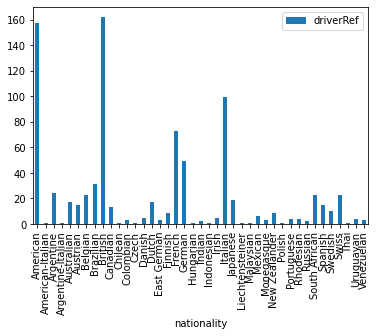

In [27]:
nationality.plot.bar()